In [1]:
from pulp import *

# Create the problem instance
prob = LpProblem("Chips_Production", LpMinimize)

# Define the decision variables
QP1 = LpVariable("QP1", lowBound=0, cat='Continuous')
QP2 = LpVariable("QP2", lowBound=0, cat='Continuous')
QP3 = LpVariable("QP3", lowBound=0, cat='Continuous')
QS1 = LpVariable("QS1", lowBound=0, cat='Continuous')
QS2 = LpVariable("QS2", lowBound=0, cat='Continuous')
QS3 = LpVariable("QS3", lowBound=0, cat='Continuous')
QW1 = LpVariable("QW1", lowBound=0, cat='Continuous')
QW2 = LpVariable("QW2", lowBound=0, cat='Continuous')
QW3 = LpVariable("QW3", lowBound=0, cat='Continuous')

y1 = LpVariable("y1", cat='Binary')
y2 = LpVariable("y2", cat='Binary')
y3 = LpVariable("y3", cat='Binary')

zP1 = LpVariable("zP1", cat='Binary')
zP2 = LpVariable("zP2", cat='Binary')
zP3 = LpVariable("zP3", cat='Binary')
zS1 = LpVariable("zS1", cat='Binary')
zS2 = LpVariable("zS2", cat='Binary')
zS3 = LpVariable("zS3", cat='Binary')
zW1 = LpVariable("zW1", cat='Binary')
zW2 = LpVariable("zW2", cat='Binary')
zW3 = LpVariable("zW3", cat='Binary')

# Objective function
prob += (
    25 * (
        2340.91 * QP1 + 1523.64 * QP2 + 2340.91 * QP3 +
        1754.68 * QS1 + 1457.39 * QS2 + 1754.68 * QS3 +
        2783.78 * QW1 + 2394.29 * QW2 + 2783.78 * QW3
    ) +
    102375 * y1 + 204750 * y2 + 102375 * y3
)

# Constraints

# Demand constraints
prob += 25 * (QP1 + QP2 + QP3) >= 153  # Pillow BBQ
prob += 25 * (QS1 + QS2 + QS3) >= 50   # Stix BBQ
prob += 25 * (QW1 + QW2 + QW3) >= 50   # Wavy BBQ

# Capacity constraints
prob += QP1 <= 4.4 * zP1
prob += QP2 <= 11 * zP2
prob += QP3 <= 4.4 * zP3
prob += QS1 <= 5.87 * zS1
prob += QS2 <= 11.5 * zS2
prob += QS3 <= 5.87 * zS3
prob += QW1 <= 3.7 * zW1
prob += QW2 <= 7 * zW2
prob += QW3 <= 3.7 * zW3

# Line usage constraints
prob += y1 >= (QP1 + QS1 + QW1) / 25
prob += y2 >= (QP2 + QS2 + QW2) / 25
prob += y3 >= (QP3 + QS3 + QW3) / 25

# Operational constraint
prob += y1 + y2 + y3 <= 2

# Updated Two SKU per Line per Day Constraints
prob += zP1 + zS1 + zW1 <= 2
prob += zP2 + zS2 + zW2 <= 2
prob += zP3 + zS3 + zW3 <= 2

# Solve the problem with detailed solver messages
prob.solve(PULP_CBC_CMD(msg=True))

# Output results
print(f"Status: {LpStatus[prob.status]}")
for v in prob.variables():
    print(f"{v.name} = {v.varValue}")
print(f"Total Cost = $ {value(prob.objective)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/a299c093-3bfe-4f9e-becb-23d18f961fbd/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/399686682c4e4722b76a9524e690de45-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/399686682c4e4722b76a9524e690de45-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 24 COLUMNS
At line 112 RHS
At line 132 BOUNDS
At line 145 ENDATA
Problem MODEL has 19 rows, 21 columns and 51 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 508584 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0004I processed model has 19 rows, 21 columns (12 integer (12 of which binary)) and 51 elements
Cbc0038I Initial state - 4 integers unsatisfied sum - 1.30806
Cbc0038I Pass   1: suminf.    0.86443 (3) obj. 508584 iterations 6
Cbc0038I Pass   2

In [4]:
import pulp

def solve_model(costs, capacities, demands):
    # Create the problem
    prob = pulp.LpProblem("Minimize_Costs", pulp.LpMinimize)
    
    # Decision Variables
    QP1 = pulp.LpVariable("QP1", lowBound=0, cat='Continuous')
    QP2 = pulp.LpVariable("QP2", lowBound=0, cat='Continuous')
    QP3 = pulp.LpVariable("QP3", lowBound=0, cat='Continuous')
    QS1 = pulp.LpVariable("QS1", lowBound=0, cat='Continuous')
    QS2 = pulp.LpVariable("QS2", lowBound=0, cat='Continuous')
    QS3 = pulp.LpVariable("QS3", lowBound=0, cat='Continuous')
    QW1 = pulp.LpVariable("QW1", lowBound=0, cat='Continuous')
    QW2 = pulp.LpVariable("QW2", lowBound=0, cat='Continuous')
    QW3 = pulp.LpVariable("QW3", lowBound=0, cat='Continuous')
    
    y1 = pulp.LpVariable("y1", cat='Binary')
    y2 = pulp.LpVariable("y2", cat='Binary')
    y3 = pulp.LpVariable("y3", cat='Binary')
    
    zP1 = pulp.LpVariable("zP1", cat='Binary')
    zP2 = pulp.LpVariable("zP2", cat='Binary')
    zP3 = pulp.LpVariable("zP3", cat='Binary')
    zS1 = pulp.LpVariable("zS1", cat='Binary')
    zS2 = pulp.LpVariable("zS2", cat='Binary')
    zS3 = pulp.LpVariable("zS3", cat='Binary')
    zW1 = pulp.LpVariable("zW1", cat='Binary')
    zW2 = pulp.LpVariable("zW2", cat='Binary')
    zW3 = pulp.LpVariable("zW3", cat='Binary')
    
    # Objective Function
    prob += (
        25 * (costs['Pillow BBQ']['Line-1'] * QP1 + costs['Pillow BBQ']['Line-2'] * QP2 + costs['Pillow BBQ']['Line-3'] * QP3 +
              costs['Stix BBQ']['Line-1'] * QS1 + costs['Stix BBQ']['Line-2'] * QS2 + costs['Stix BBQ']['Line-3'] * QS3 +
              costs['Wavy BBQ']['Line-1'] * QW1 + costs['Wavy BBQ']['Line-2'] * QW2 + costs['Wavy BBQ']['Line-3'] * QW3) +
        capacities['Line-1']['Fixed'] * y1 + capacities['Line-2']['Fixed'] * y2 + capacities['Line-3']['Fixed'] * y3
    )
    
    # Constraints
    prob += 25 * (QP1 + QP2 + QP3) >= demands['Pillow BBQ']
    prob += 25 * (QS1 + QS2 + QS3) >= demands['Stix BBQ']
    prob += 25 * (QW1 + QW2 + QW3) >= demands['Wavy BBQ']
    
    prob += QP1 <= capacities['Line-1']['Pillow BBQ'] * zP1
    prob += QP2 <= capacities['Line-2']['Pillow BBQ'] * zP2
    prob += QP3 <= capacities['Line-3']['Pillow BBQ'] * zP3
    
    prob += QS1 <= capacities['Line-1']['Stix BBQ'] * zS1
    prob += QS2 <= capacities['Line-2']['Stix BBQ'] * zS2
    prob += QS3 <= capacities['Line-3']['Stix BBQ'] * zS3
    
    prob += QW1 <= capacities['Line-1']['Wavy BBQ'] * zW1
    prob += QW2 <= capacities['Line-2']['Wavy BBQ'] * zW2
    prob += QW3 <= capacities['Line-3']['Wavy BBQ'] * zW3
    
    prob += y1 >= (QP1 + QS1 + QW1) / (4.4 + 5.87 + 3.7)
    prob += y2 >= (QP2 + QS2 + QW2) / (11 + 11.5 + 7)
    prob += y3 >= (QP3 + QS3 + QW3) / (4.4 + 5.87 + 3.7)
    
    prob += y1 + y2 + y3 <= 2
    
    prob += zP1 + zS1 + zW1 <= 2
    prob += zP2 + zS2 + zW2 <= 2
    prob += zP3 + zS3 + zW3 <= 2
    
    # Solve the problem
    prob.solve()
    
    # Get the results
    results = {
        'QP1': pulp.value(QP1),
        'QP2': pulp.value(QP2),
        'QP3': pulp.value(QP3),
        'QS1': pulp.value(QS1),
        'QS2': pulp.value(QS2),
        'QS3': pulp.value(QS3),
        'QW1': pulp.value(QW1),
        'QW2': pulp.value(QW2),
        'QW3': pulp.value(QW3),
        'y1': pulp.value(y1),
        'y2': pulp.value(y2),
        'y3': pulp.value(y3),
        'zP1': pulp.value(zP1),
        'zP2': pulp.value(zP2),
        'zP3': pulp.value(zP3),
        'zS1': pulp.value(zS1),
        'zS2': pulp.value(zS2),
        'zS3': pulp.value(zS3),
        'zW1': pulp.value(zW1),
        'zW2': pulp.value(zW2),
        'zW3': pulp.value(zW3),
        'Total Cost': pulp.value(prob.objective)
    }
    
    return results

# Base Parameters
costs = {
    'Pillow BBQ': {'Line-1': 2340.91, 'Line-2': 1523.64, 'Line-3': 2340.91},
    'Stix BBQ': {'Line-1': 1754.68, 'Line-2': 1457.39, 'Line-3': 1754.68},
    'Wavy BBQ': {'Line-1': 2783.78, 'Line-2': 2394.29, 'Line-3': 2783.78}
}

capacities = {
    'Line-1': {'Fixed': 102375, 'Pillow BBQ': 4.4, 'Stix BBQ': 5.87, 'Wavy BBQ': 3.7},
    'Line-2': {'Fixed': 204750, 'Pillow BBQ': 11, 'Stix BBQ': 11.5, 'Wavy BBQ': 7},
    'Line-3': {'Fixed': 102375, 'Pillow BBQ': 4.4, 'Stix BBQ': 5.87, 'Wavy BBQ': 3.7}
}

demands = {
    'Pillow BBQ': 153,
    'Stix BBQ': 50,
    'Wavy BBQ': 50
}

# Solve the base model
base_results = solve_model(costs, capacities, demands)
print("Base Results:", base_results)

# Sensitivity Analysis
def sensitivity_analysis():
    # Vary the demand for Pillow BBQ
    for demand in range(150, 170, 10):
        print(f"Demand for Pillow BBQ: {demand}")
        new_demands = demands.copy()
        new_demands['Pillow BBQ'] = demand
        results = solve_model(costs, capacities, new_demands)
        print(f"Results: {results}")
    
    # Vary the capacity of Line-2 for Pillow BBQ
    for capacity in range(10, 15, 1):
        print(f"Capacity of Line-2 for Pillow BBQ: {capacity} MT")
        new_capacities = capacities.copy()
        new_capacities['Line-2']['Pillow BBQ'] = capacity
        results = solve_model(costs, new_capacities, demands)
        print(f"Results: {results}")

    # Vary the cost of Wavy BBQ on Line-2
    for cost in range(2300, 2500, 50):
        print(f"Cost of Wavy BBQ on Line-2: ${


SyntaxError: unterminated string literal (detected at line 141) (3806028727.py, line 141)

In [6]:
import pulp

def solve_model(costs, capacities, demands):
    # Create the problem
    prob = pulp.LpProblem("Minimize_Costs", pulp.LpMinimize)
    
    # Decision Variables
    QP1 = pulp.LpVariable("QP1", lowBound=0, cat='Continuous')
    QP2 = pulp.LpVariable("QP2", lowBound=0, cat='Continuous')
    QP3 = pulp.LpVariable("QP3", lowBound=0, cat='Continuous')
    QS1 = pulp.LpVariable("QS1", lowBound=0, cat='Continuous')
    QS2 = pulp.LpVariable("QS2", lowBound=0, cat='Continuous')
    QS3 = pulp.LpVariable("QS3", lowBound=0, cat='Continuous')
    QW1 = pulp.LpVariable("QW1", lowBound=0, cat='Continuous')
    QW2 = pulp.LpVariable("QW2", lowBound=0, cat='Continuous')
    QW3 = pulp.LpVariable("QW3", lowBound=0, cat='Continuous')
    
    y1 = pulp.LpVariable("y1", cat='Binary')
    y2 = pulp.LpVariable("y2", cat='Binary')
    y3 = pulp.LpVariable("y3", cat='Binary')
    
    zP1 = pulp.LpVariable("zP1", cat='Binary')
    zP2 = pulp.LpVariable("zP2", cat='Binary')
    zP3 = pulp.LpVariable("zP3", cat='Binary')
    zS1 = pulp.LpVariable("zS1", cat='Binary')
    zS2 = pulp.LpVariable("zS2", cat='Binary')
    zS3 = pulp.LpVariable("zS3", cat='Binary')
    zW1 = pulp.LpVariable("zW1", cat='Binary')
    zW2 = pulp.LpVariable("zW2", cat='Binary')
    zW3 = pulp.LpVariable("zW3", cat='Binary')
    
    # Objective Function
    prob += (
        25 * (costs['Pillow BBQ']['Line-1'] * QP1 + costs['Pillow BBQ']['Line-2'] * QP2 + costs['Pillow BBQ']['Line-3'] * QP3 +
              costs['Stix BBQ']['Line-1'] * QS1 + costs['Stix BBQ']['Line-2'] * QS2 + costs['Stix BBQ']['Line-3'] * QS3 +
              costs['Wavy BBQ']['Line-1'] * QW1 + costs['Wavy BBQ']['Line-2'] * QW2 + costs['Wavy BBQ']['Line-3'] * QW3) +
        capacities['Line-1']['Fixed'] * y1 + capacities['Line-2']['Fixed'] * y2 + capacities['Line-3']['Fixed'] * y3
    )
    
    # Constraints
    prob += 25 * (QP1 + QP2 + QP3) >= demands['Pillow BBQ']
    prob += 25 * (QS1 + QS2 + QS3) >= demands['Stix BBQ']
    prob += 25 * (QW1 + QW2 + QW3) >= demands['Wavy BBQ']
    
    prob += QP1 <= capacities['Line-1']['Pillow BBQ'] * zP1
    prob += QP2 <= capacities['Line-2']['Pillow BBQ'] * zP2
    prob += QP3 <= capacities['Line-3']['Pillow BBQ'] * zP3
    
    prob += QS1 <= capacities['Line-1']['Stix BBQ'] * zS1
    prob += QS2 <= capacities['Line-2']['Stix BBQ'] * zS2
    prob += QS3 <= capacities['Line-3']['Stix BBQ'] * zS3
    
    prob += QW1 <= capacities['Line-1']['Wavy BBQ'] * zW1
    prob += QW2 <= capacities['Line-2']['Wavy BBQ'] * zW2
    prob += QW3 <= capacities['Line-3']['Wavy BBQ'] * zW3
    
    prob += y1 >= (QP1 + QS1 + QW1) / (capacities['Line-1']['Pillow BBQ'] + capacities['Line-1']['Stix BBQ'] + capacities['Line-1']['Wavy BBQ'])
    prob += y2 >= (QP2 + QS2 + QW2) / (capacities['Line-2']['Pillow BBQ'] + capacities['Line-2']['Stix BBQ'] + capacities['Line-2']['Wavy BBQ'])
    prob += y3 >= (QP3 + QS3 + QW3) / (capacities['Line-3']['Pillow BBQ'] + capacities['Line-3']['Stix BBQ'] + capacities['Line-3']['Wavy BBQ'])
    
    prob += y1 + y2 + y3 <= 2
    
    prob += zP1 + zS1 + zW1 <= 2
    prob += zP2 + zS2 + zW2 <= 2
    prob += zP3 + zS3 + zW3 <= 2
    
    # Solve the problem
    prob.solve()
    
    # Get the results
    results = {
        'QP1': pulp.value(QP1),
        'QP2': pulp.value(QP2),
        'QP3': pulp.value(QP3),
        'QS1': pulp.value(QS1),
        'QS2': pulp.value(QS2),
        'QS3': pulp.value(QS3),
        'QW1': pulp.value(QW1),
        'QW2': pulp.value(QW2),
        'QW3': pulp.value(QW3),
        'y1': pulp.value(y1),
        'y2': pulp.value(y2),
        'y3': pulp.value(y3),
        'zP1': pulp.value(zP1),
        'zP2': pulp.value(zP2),
        'zP3': pulp.value(zP3),
        'zS1': pulp.value(zS1),
        'zS2': pulp.value(zS2),
        'zS3': pulp.value(zS3),
        'zW1': pulp.value(zW1),
        'zW2': pulp.value(zW2),
        'zW3': pulp.value(zW3),
        'Total Cost': pulp.value(prob.objective)
    }
    
    return results

# Base Parameters
costs = {
    'Pillow BBQ': {'Line-1': 2340.91, 'Line-2': 1523.64, 'Line-3': 2340.91},
    'Stix BBQ': {'Line-1': 1754.68, 'Line-2': 1457.39, 'Line-3': 1754.68},
    'Wavy BBQ': {'Line-1': 2783.78, 'Line-2': 2394.29, 'Line-3': 2783.78}
}

capacities = {
    'Line-1': {'Fixed': 102375, 'Pillow BBQ': 4.4, 'Stix BBQ': 5.87, 'Wavy BBQ': 3.7},
    'Line-2': {'Fixed': 204750, 'Pillow BBQ': 11, 'Stix BBQ': 11.5, 'Wavy BBQ': 7},
    'Line-3': {'Fixed': 102375, 'Pillow BBQ': 4.4, 'Stix BBQ': 5.87, 'Wavy BBQ': 3.7}
}

demands = {
    'Pillow BBQ': 153,
    'Stix BBQ': 50,
    'Wavy BBQ': 50
}

# Solve the base model
base_results = solve_model(costs, capacities, demands)
print("Base Results:", base_results)

# Sensitivity Analysis
def sensitivity_analysis():
    # Vary the demand for Pillow BBQ
    print("Sensitivity Analysis for Demand of Pillow BBQ:")
    for demand in range(150, 170, 10):
        print(f"\nDemand for Pillow BBQ: {demand}")
        new_demands = demands.copy()
        new_demands['Pillow BBQ'] = demand
        results = solve_model(costs, capacities, new_demands)
        print(f"Results: {results}")
    
    # Vary the capacity of Line-2 for Pillow BBQ
    print("\nSensitivity Analysis for Capacity of Line-2 for Pillow BBQ:")
    for capacity in range(10, 15, 1):
        print(f"Capacity of Line-2 for Pillow BBQ: {capacity} MT")
        new_capacities = capacities.copy()
        new_capacities['Line-2']['Pillow BBQ'] = capacity
        results = solve_model(costs, new_capacities, demands)
        print(f"Results: {results}")

    # Vary the cost of Wavy BBQ on Line-2
    print("\nSensitivity Analysis for Cost of Wavy BBQ on Line-2:")
    for cost in range(2300, 2500, 50):
        print(f"Cost of Wavy BBQ on Line-2: ${cost}")
        new_costs = costs.copy()
        new_costs['Wavy BBQ']['Line-2'] = cost
        results = solve_model(new_costs, capacities, demands)
        print(f"Results: {results}")

# Perform sensitivity analysis
sensitivity_analysis()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/a299c093-3bfe-4f9e-becb-23d18f961fbd/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/309fdcbac3b64ebabe4a37f50baa5363-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/309fdcbac3b64ebabe4a37f50baa5363-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 24 COLUMNS
At line 112 RHS
At line 132 BOUNDS
At line 145 ENDATA
Problem MODEL has 19 rows, 21 columns and 51 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 495941 - 0.00 seconds
Cgl0004I processed model has 19 rows, 21 columns (12 integer (12 of which binary)) and 51 elements
Cbc0038I Initial state - 4 integers unsatisfied sum - 1.24631
Cbc0038I Pass   1: suminf.    0.80268 (3) obj. 495941 iterations 7
Cbc0038I Pass   2: suminf.    0.88727 (2) obj. 630451 iterations 8
Cbc0038I Pass   3: suminf

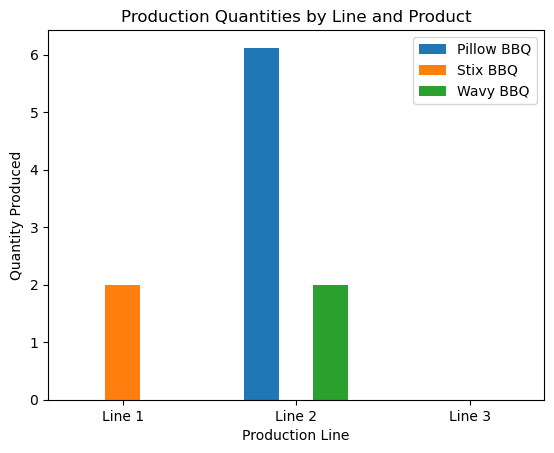

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the solved model
products = ['Pillow BBQ', 'Stix BBQ', 'Wavy BBQ']
lines = ['Line 1', 'Line 2', 'Line 3']

quantities = np.array([
    [QP1.varValue, QS1.varValue, QW1.varValue],
    [QP2.varValue, QS2.varValue, QW2.varValue],
    [QP3.varValue, QS3.varValue, QW3.varValue]
])

fig, ax = plt.subplots()
width = 0.2  # Width of the bars

# Bar positions
x = np.arange(len(lines))

# Plotting bars for each product
for i in range(len(products)):
    ax.bar(x + i * width, quantities[:, i], width, label=products[i])

ax.set_xlabel('Production Line')
ax.set_ylabel('Quantity Produced')
ax.set_title('Production Quantities by Line and Product')
ax.set_xticks(x + width)
ax.set_xticklabels(lines)
ax.legend()

plt.show()


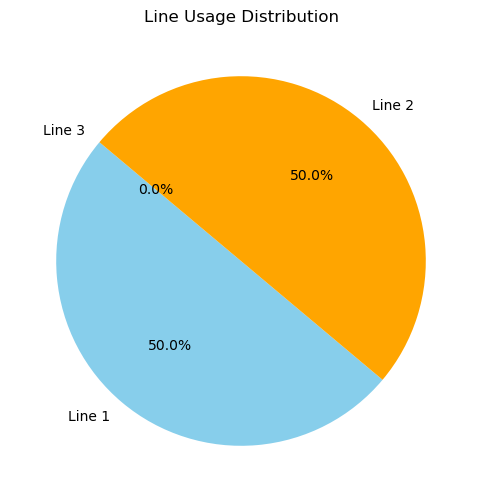

In [11]:
# Data for line usage
line_usage = [y1.varValue, y2.varValue, y3.varValue]
labels = ['Line 1', 'Line 2', 'Line 3']

plt.figure(figsize=(6, 6))
plt.pie(line_usage, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Line Usage Distribution')
plt.show()


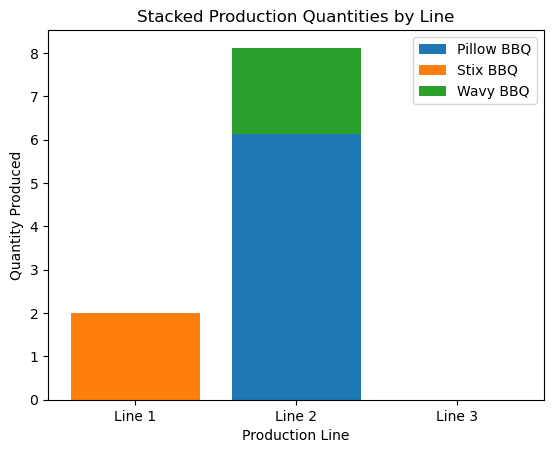

In [13]:
fig, ax = plt.subplots()

# Stack production quantities
ax.bar(lines, quantities[:, 0], label='Pillow BBQ')
ax.bar(lines, quantities[:, 1], bottom=quantities[:, 0], label='Stix BBQ')
ax.bar(lines, quantities[:, 2], bottom=quantities[:, 0] + quantities[:, 1], label='Wavy BBQ')

ax.set_xlabel('Production Line')
ax.set_ylabel('Quantity Produced')
ax.set_title('Stacked Production Quantities by Line')
ax.legend()

plt.show()


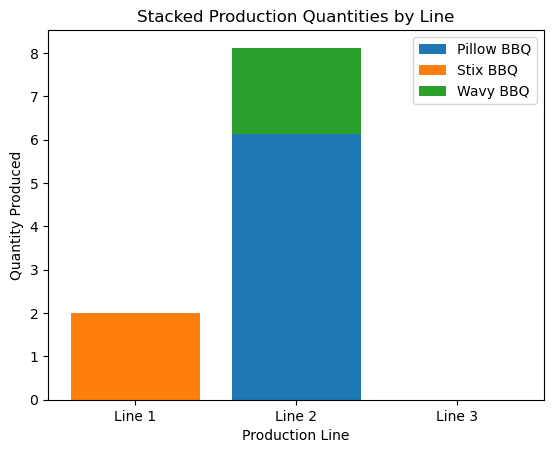

In [15]:
fig, ax = plt.subplots()

# Stack production quantities
ax.bar(lines, quantities[:, 0], label='Pillow BBQ')
ax.bar(lines, quantities[:, 1], bottom=quantities[:, 0], label='Stix BBQ')
ax.bar(lines, quantities[:, 2], bottom=quantities[:, 0] + quantities[:, 1], label='Wavy BBQ')

ax.set_xlabel('Production Line')
ax.set_ylabel('Quantity Produced')
ax.set_title('Stacked Production Quantities by Line')
ax.legend()

plt.show()


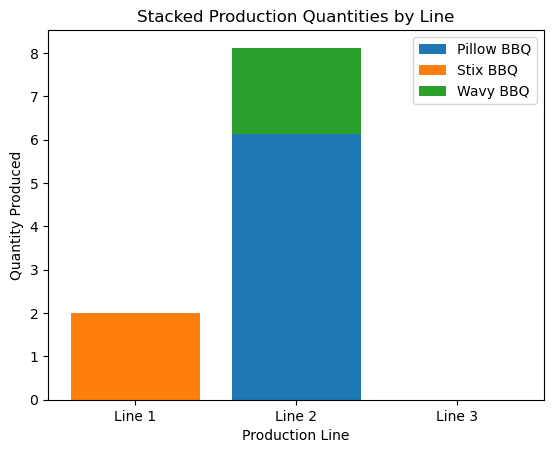

In [17]:
fig, ax = plt.subplots()

# Stack production quantities
ax.bar(lines, quantities[:, 0], label='Pillow BBQ')
ax.bar(lines, quantities[:, 1], bottom=quantities[:, 0], label='Stix BBQ')
ax.bar(lines, quantities[:, 2], bottom=quantities[:, 0] + quantities[:, 1], label='Wavy BBQ')

ax.set_xlabel('Production Line')
ax.set_ylabel('Quantity Produced')
ax.set_title('Stacked Production Quantities by Line')
ax.legend()

plt.show()


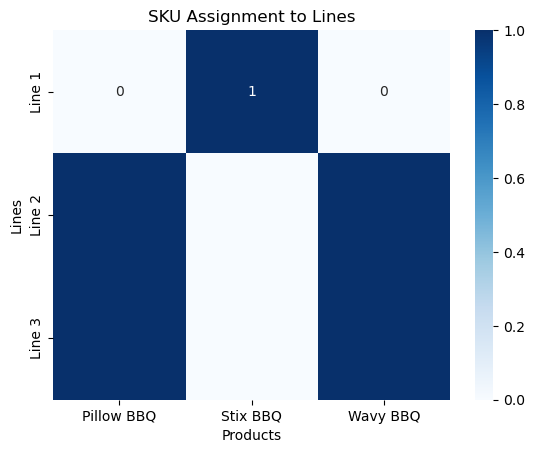

In [19]:
import seaborn as sns

# Data for heatmap
assignment = np.array([
    [zP1.varValue, zS1.varValue, zW1.varValue],
    [zP2.varValue, zS2.varValue, zW2.varValue],
    [zP3.varValue, zS3.varValue, zW3.varValue]
])

sns.heatmap(assignment, annot=True, cmap='Blues', xticklabels=products, yticklabels=lines)
plt.title('SKU Assignment to Lines')
plt.xlabel('Products')
plt.ylabel('Lines')
plt.show()


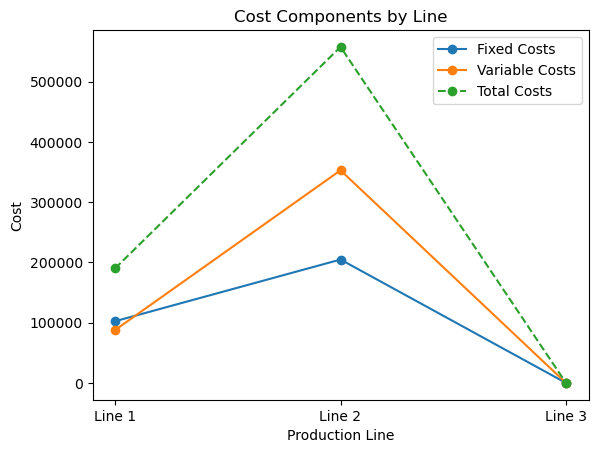

In [21]:
# Data for cost components
fixed_costs = [102375 * y1.varValue, 204750 * y2.varValue, 102375 * y3.varValue]
variable_costs = [
    25 * (2340.91 * QP1.varValue + 1754.68 * QS1.varValue + 2783.78 * QW1.varValue),
    25 * (1523.64 * QP2.varValue + 1457.39 * QS2.varValue + 2394.29 * QW2.varValue),
    25 * (2340.91 * QP3.varValue + 1754.68 * QS3.varValue + 2783.78 * QW3.varValue)
]

line_costs = np.array(fixed_costs) + np.array(variable_costs)

plt.plot(lines, fixed_costs, label='Fixed Costs', marker='o')
plt.plot(lines, variable_costs, label='Variable Costs', marker='o')
plt.plot(lines, line_costs, label='Total Costs', marker='o', linestyle='--')

plt.xlabel('Production Line')
plt.ylabel('Cost')
plt.title('Cost Components by Line')
plt.legend()
plt.show()


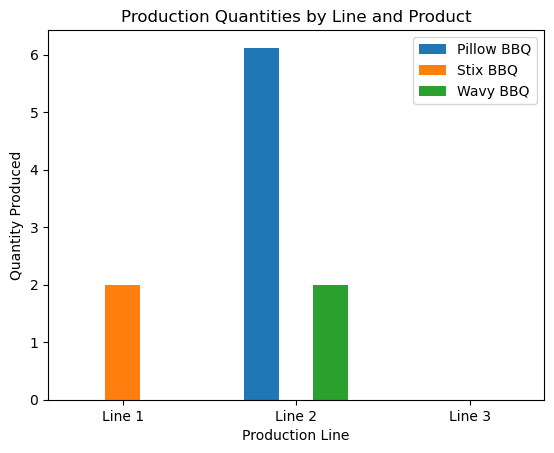

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the solved model
products = ['Pillow BBQ', 'Stix BBQ', 'Wavy BBQ']
lines = ['Line 1', 'Line 2', 'Line 3']

quantities = np.array([
    [0.0, 2.0, 0.0],    # Line 1
    [6.12, 0.0, 2.0],   # Line 2
    [0.0, 0.0, 0.0]     # Line 3
])

fig, ax = plt.subplots()
width = 0.2  # Width of the bars

# Bar positions
x = np.arange(len(lines))

# Plotting bars for each product
for i in range(len(products)):
    ax.bar(x + i * width, quantities[:, i], width, label=products[i])

ax.set_xlabel('Production Line')
ax.set_ylabel('Quantity Produced')
ax.set_title('Production Quantities by Line and Product')
ax.set_xticks(x + width)
ax.set_xticklabels(lines)
ax.legend()

plt.show()


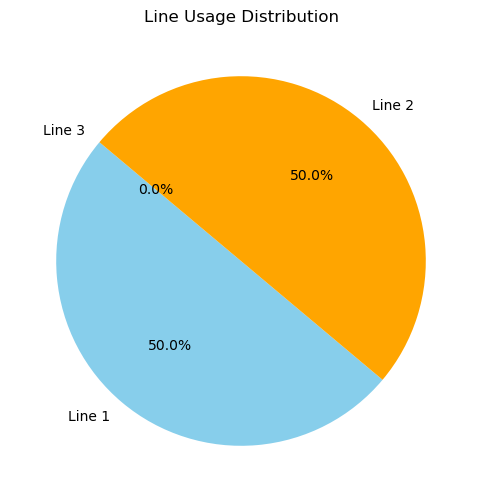

In [25]:
# Data for line usage
line_usage = [1.0, 1.0, 0.0]  # y1, y2, y3
labels = ['Line 1', 'Line 2', 'Line 3']

plt.figure(figsize=(6, 6))
plt.pie(line_usage, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Line Usage Distribution')
plt.show()


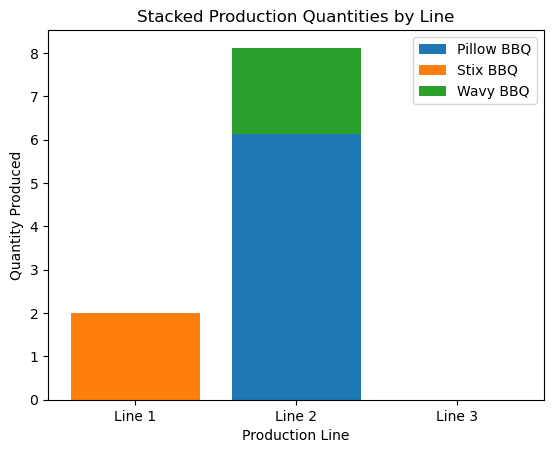

In [27]:
fig, ax = plt.subplots()

# Stack production quantities
ax.bar(lines, quantities[:, 0], label='Pillow BBQ')
ax.bar(lines, quantities[:, 1], bottom=quantities[:, 0], label='Stix BBQ')
ax.bar(lines, quantities[:, 2], bottom=quantities[:, 0] + quantities[:, 1], label='Wavy BBQ')

ax.set_xlabel('Production Line')
ax.set_ylabel('Quantity Produced')
ax.set_title('Stacked Production Quantities by Line')
ax.legend()

plt.show()


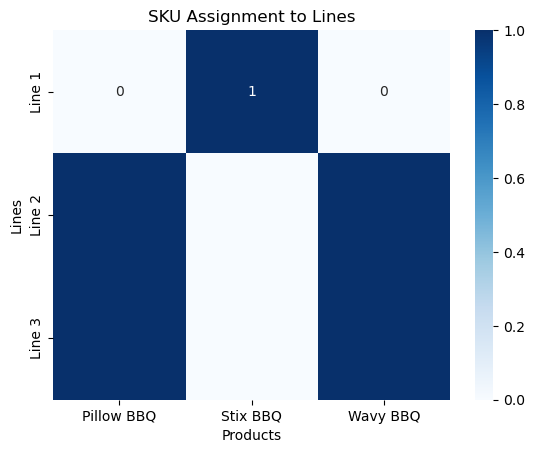

In [29]:
import seaborn as sns

# Data for heatmap
assignment = np.array([
    [0.0, 1.0, 0.0],  # Line 1: zP1, zS1, zW1
    [1.0, 0.0, 1.0],  # Line 2: zP2, zS2, zW2
    [1.0, 0.0, 1.0]   # Line 3: zP3, zS3, zW3
])

sns.heatmap(assignment, annot=True, cmap='Blues', xticklabels=products, yticklabels=lines)
plt.title('SKU Assignment to Lines')
plt.xlabel('Products')
plt.ylabel('Lines')
plt.show()


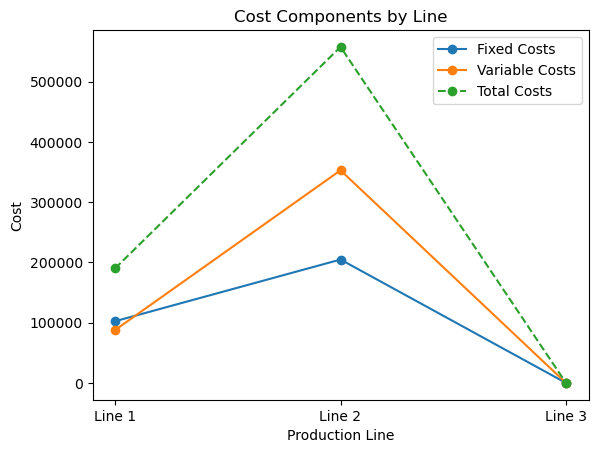

In [31]:
# Data for cost components
fixed_costs = [102375 * 1.0, 204750 * 1.0, 102375 * 0.0]  # y1, y2, y3
variable_costs = [
    25 * (2340.91 * 0.0 + 1754.68 * 2.0 + 2783.78 * 0.0),  # Line 1: QP1, QS1, QW1
    25 * (1523.64 * 6.12 + 1457.39 * 0.0 + 2394.29 * 2.0), # Line 2: QP2, QS2, QW2
    25 * (2340.91 * 0.0 + 1754.68 * 0.0 + 2783.78 * 0.0)   # Line 3: QP3, QS3, QW3
]

line_costs = np.array(fixed_costs) + np.array(variable_costs)

plt.plot(lines, fixed_costs, label='Fixed Costs', marker='o')
plt.plot(lines, variable_costs, label='Variable Costs', marker='o')
plt.plot(lines, line_costs, label='Total Costs', marker='o', linestyle='--')

plt.xlabel('Production Line')
plt.ylabel('Cost')
plt.title('Cost Components by Line')
plt.legend()
plt.show()


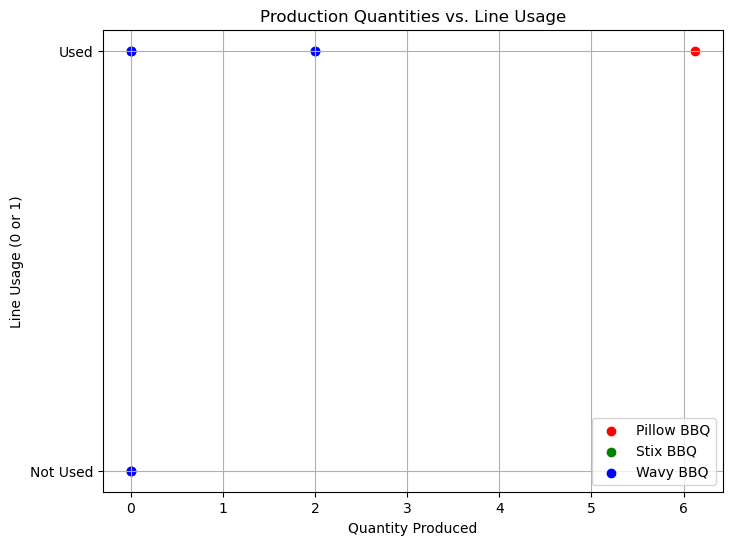

In [33]:
plt.figure(figsize=(8, 6))

# Scatter plot for each line
plt.scatter(quantities[:, 0], line_usage, color='red', label='Pillow BBQ')
plt.scatter(quantities[:, 1], line_usage, color='green', label='Stix BBQ')
plt.scatter(quantities[:, 2], line_usage, color='blue', label='Wavy BBQ')

plt.xlabel('Quantity Produced')
plt.ylabel('Line Usage (0 or 1)')
plt.title('Production Quantities vs. Line Usage')
plt.yticks([0, 1], ['Not Used', 'Used'])
plt.legend()
plt.grid(True)
plt.show()


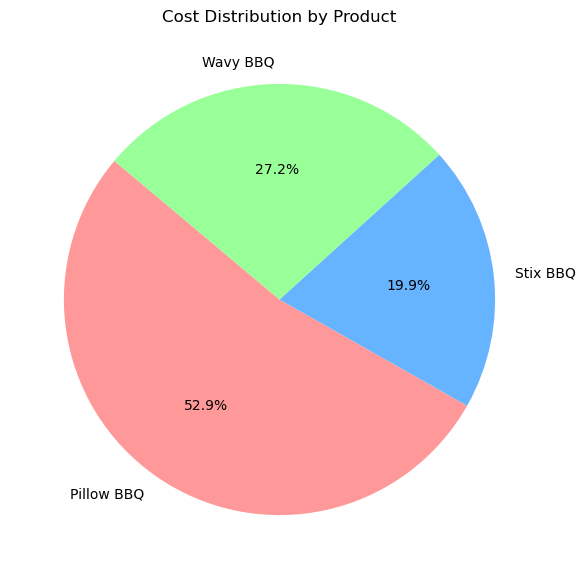

In [35]:
# Calculate costs per product
costs = [
    25 * (2340.91 * 0.0 + 1523.64 * 6.12 + 2340.91 * 0.0),  # Pillow BBQ
    25 * (1754.68 * 2.0 + 1457.39 * 0.0 + 1754.68 * 0.0),   # Stix BBQ
    25 * (2783.78 * 0.0 + 2394.29 * 2.0 + 2783.78 * 0.0)    # Wavy BBQ
]

plt.figure(figsize=(7, 7))
plt.pie(costs, labels=products, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Cost Distribution by Product')
plt.show()


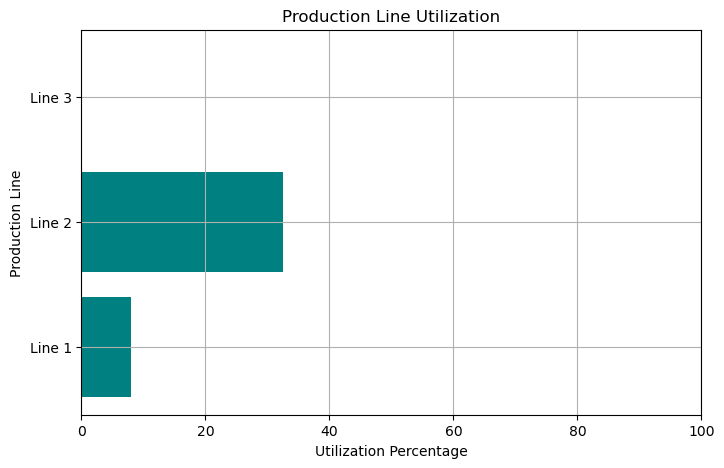

In [37]:
# Calculate utilization percentages
max_capacities = [25, 25, 25]  # Assuming 25 units as max capacity for each line
utilizations = [sum(quantities[0]) / max_capacities[0] * 100,
                sum(quantities[1]) / max_capacities[1] * 100,
                sum(quantities[2]) / max_capacities[2] * 100]

plt.figure(figsize=(8, 5))
plt.barh(lines, utilizations, color='teal')
plt.xlabel('Utilization Percentage')
plt.ylabel('Production Line')
plt.title('Production Line Utilization')
plt.xlim(0, 100)
plt.grid(True)
plt.show()


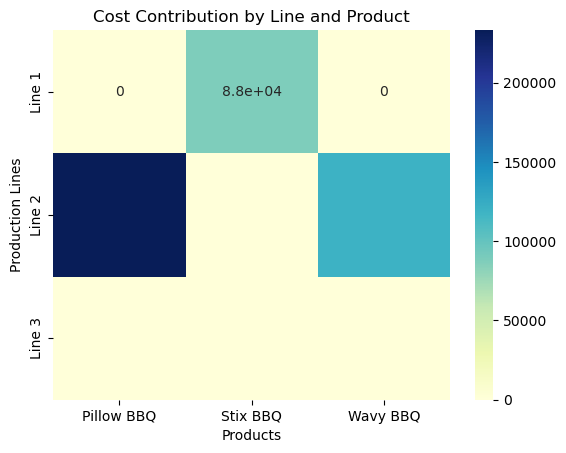

In [39]:
cost_contribution = np.array([
    [25 * 2340.91 * 0.0, 25 * 1754.68 * 2.0, 25 * 2783.78 * 0.0],  # Line 1
    [25 * 1523.64 * 6.12, 25 * 1457.39 * 0.0, 25 * 2394.29 * 2.0], # Line 2
    [25 * 2340.91 * 0.0, 25 * 1754.68 * 0.0, 25 * 2783.78 * 0.0]   # Line 3
])

sns.heatmap(cost_contribution, annot=True, cmap='YlGnBu', xticklabels=products, yticklabels=lines)
plt.title('Cost Contribution by Line and Product')
plt.xlabel('Products')
plt.ylabel('Production Lines')
plt.show()


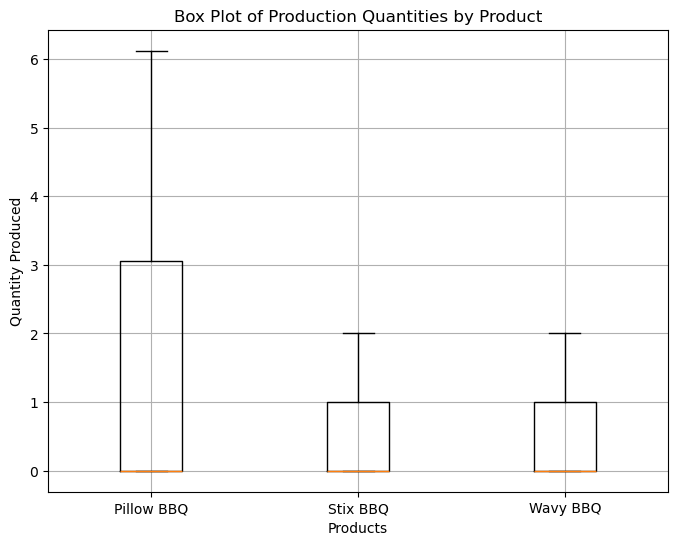

In [41]:
plt.figure(figsize=(8, 6))

# Box plot of quantities produced on each line
plt.boxplot([quantities[:, 0], quantities[:, 1], quantities[:, 2]], labels=products)

plt.xlabel('Products')
plt.ylabel('Quantity Produced')
plt.title('Box Plot of Production Quantities by Product')
plt.grid(True)
plt.show()


In [1]:
import matplotlib.pyplot as plt

# Data for the current and optimal costs
cost_labels = ['Current', 'Optimal']
total_costs = [1125375, 747690.42]
fixed_costs = [368875, 307375]
variable_costs = [756500, 440315.42]

# Plot 1: Total Production Related Cost Comparison
plt.figure(figsize=(8, 6))
plt.bar(cost_labels, total_costs, color=['blue', 'green'])
plt.title('Total Production Related Cost Comparison')
plt.ylabel('Cost (BDT)')
plt.show()

# Plot 2: Comparison of Fixed and Variable Costs
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(cost_labels))

plt.bar(index, fixed_costs, bar_width, label='Fixed Cost', color='red')
plt.bar([i + bar_width for i in index], variable_costs, bar_width, label='Variable Cost', color='orange')

plt.xlabel('Cost Type')
plt.ylabel('Cost (BDT)')
plt.title('Comparison of Fixed and Variable Costs')
plt.xticks([i + bar_width / 2 for i in index], cost_labels)
plt.legend()
plt.tight_layout()

plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

# Data for the current and optimal costs
cost_labels = ['Current', 'Optimal']
total_costs = [1125375, 747690.42]
fixed_costs = [368875, 307375]
variable_costs = [756500, 440315.42]

# Plot 1: Total Production Related Cost Comparison
plt.figure(figsize=(8, 6))
plt.bar(cost_labels, total_costs, color=['blue', 'green'])
plt.title('Total Production Related Cost Comparison')
plt.ylabel('Cost (BDT)')
plt.show()

# Plot 2: Comparison of Fixed and Variable Costs
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(cost_labels))

plt.bar(index, fixed_costs, bar_width, label='Fixed Cost', color='red')
plt.bar([i + bar_width for i in index], variable_costs, bar_width, label='Variable Cost', color='orange')

plt.xlabel('Cost Type')
plt.ylabel('Cost (BDT)')
plt.title('Comparison of Fixed and Variable Costs')
plt.xticks([i + bar_width / 2 for i in index], cost_labels)
plt.legend()
plt.tight_layout()

plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 748.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 721.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 735.7 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


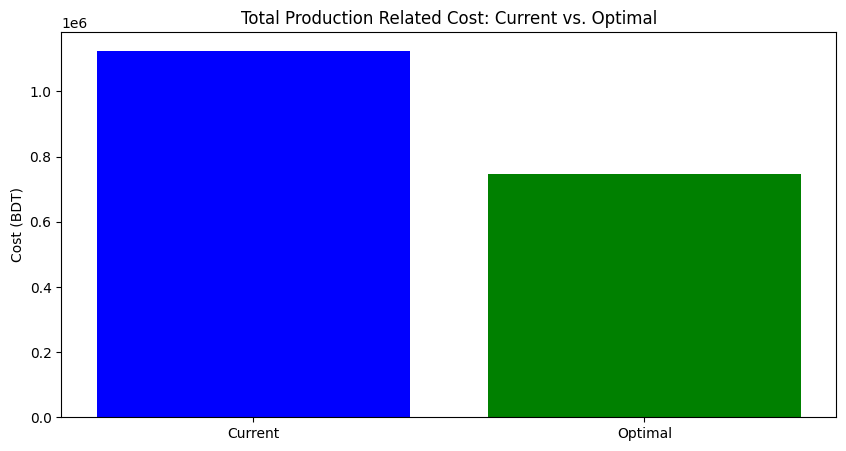

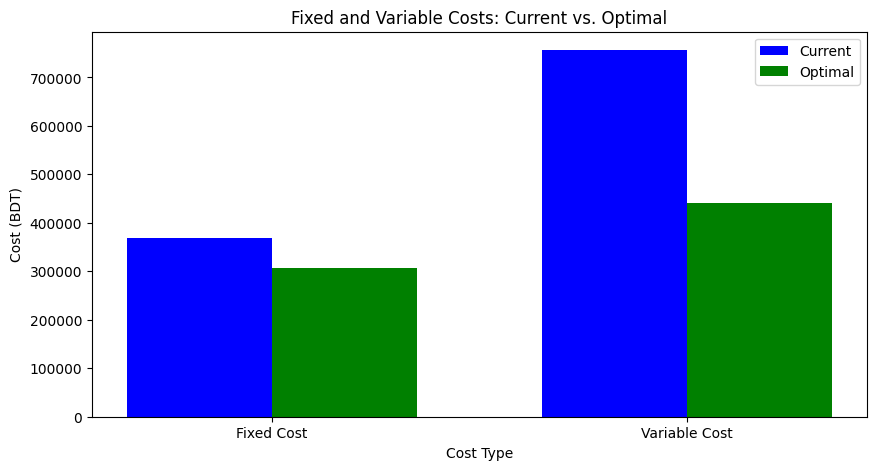

In [1]:
import matplotlib.pyplot as plt

# Data for the current and optimal costs
cost_labels = ['Current', 'Optimal']
total_costs = [1125375, 747690.42]

# Plot 1: Total Production Related Costs
plt.figure(figsize=(10, 5))
plt.bar(cost_labels, total_costs, color=['blue', 'green'])
plt.title('Total Production Related Cost: Current vs. Optimal')
plt.ylabel('Cost (BDT)')
plt.show()

# Data for the fixed and variable costs comparison
cost_types = ['Fixed Cost', 'Variable Cost']
current_costs = [368875, 756500]
optimal_costs = [307375, 440315.42]

# Plot 2: Fixed and Variable Costs Comparison
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = range(len(cost_types))

plt.bar(index, current_costs, bar_width, label='Current', color='blue')
plt.bar([i + bar_width for i in index], optimal_costs, bar_width, label='Optimal', color='green')

plt.title('Fixed and Variable Costs: Current vs. Optimal')
plt.xlabel('Cost Type')
plt.ylabel('Cost (BDT)')
plt.xticks([i + bar_width / 2 for i in index], cost_types)
plt.legend()
plt.show()


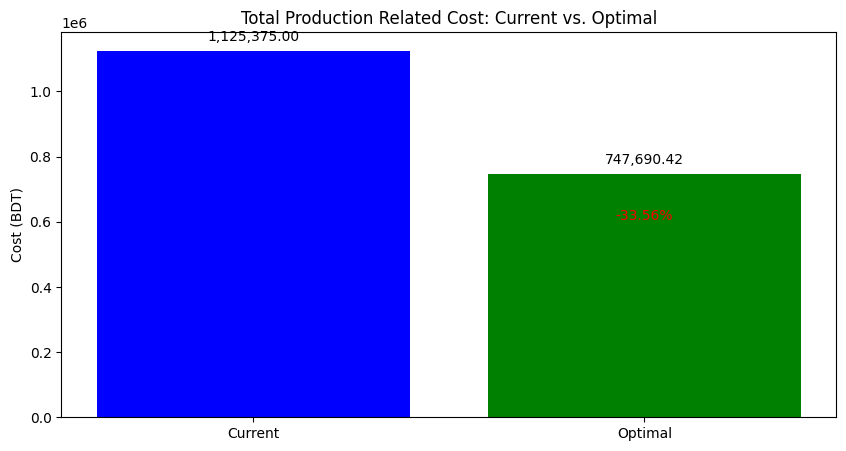

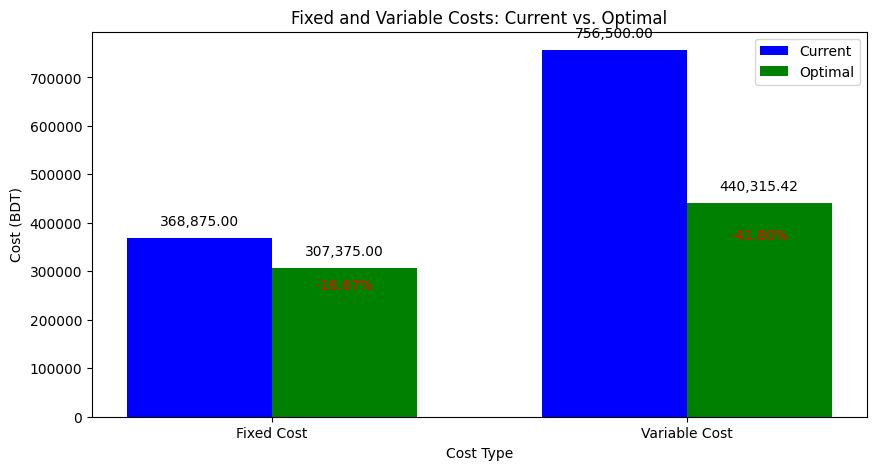

In [2]:
import matplotlib.pyplot as plt

# Data for the current and optimal costs
cost_labels = ['Current', 'Optimal']
total_costs = [1125375, 747690.42]

# Calculate the percentage reduction for total cost
percentage_reduction_total = ((total_costs[0] - total_costs[1]) / total_costs[0]) * 100

# Plot 1: Total Production Related Costs with percentage reduction
plt.figure(figsize=(10, 5))
plt.bar(cost_labels, total_costs, color=['blue', 'green'])

# Annotate the bars with the cost values and percentage reduction
for i in range(len(total_costs)):
    plt.text(i, total_costs[i] + 20000, f'{total_costs[i]:,.2f}', ha='center', va='bottom')
if percentage_reduction_total > 0:
    plt.text(1, total_costs[1] - 150000, f'-{percentage_reduction_total:.2f}%', ha='center', va='bottom', color='red')

plt.title('Total Production Related Cost: Current vs. Optimal')
plt.ylabel('Cost (BDT)')
plt.show()

# Data for the fixed and variable costs comparison
cost_types = ['Fixed Cost', 'Variable Cost']
current_costs = [368875, 756500]
optimal_costs = [307375, 440315.42]

# Calculate the percentage reductions for fixed and variable costs
percentage_reduction_fixed = ((current_costs[0] - optimal_costs[0]) / current_costs[0]) * 100
percentage_reduction_variable = ((current_costs[1] - optimal_costs[1]) / current_costs[1]) * 100

# Plot 2: Fixed and Variable Costs Comparison with percentage reductions
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = range(len(cost_types))

plt.bar(index, current_costs, bar_width, label='Current', color='blue')
plt.bar([i + bar_width for i in index], optimal_costs, bar_width, label='Optimal', color='green')

# Annotate the bars with the cost values and percentage reductions
for i in range(len(current_costs)):
    plt.text(i, current_costs[i] + 20000, f'{current_costs[i]:,.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, optimal_costs[i] + 20000, f'{optimal_costs[i]:,.2f}', ha='center', va='bottom')
    if i == 0:
        plt.text(i + bar_width, optimal_costs[i] - 50000, f'-{percentage_reduction_fixed:.2f}%', ha='center', va='bottom', color='red')
    else:
        plt.text(i + bar_width, optimal_costs[i] - 80000, f'-{percentage_reduction_variable:.2f}%', ha='center', va='bottom', color='red')

plt.title('Fixed and Variable Costs: Current vs. Optimal')
plt.xlabel('Cost Type')
plt.ylabel('Cost (BDT)')
plt.xticks([i + bar_width / 2 for i in index], cost_types)
plt.legend()
plt.show()


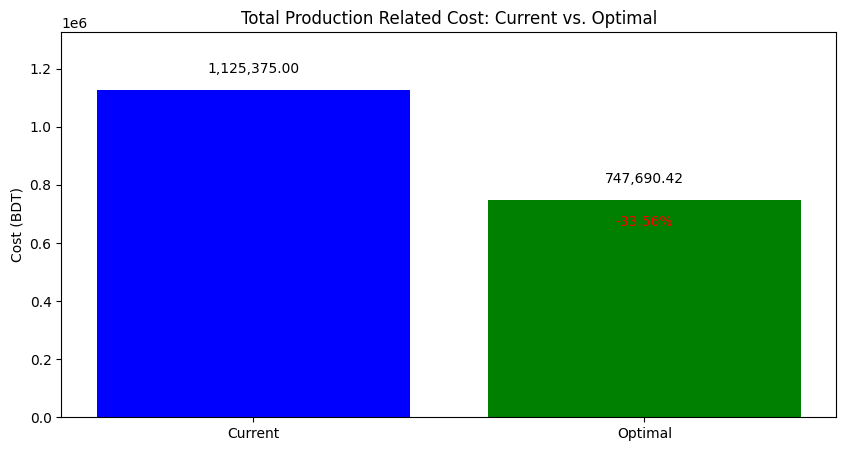

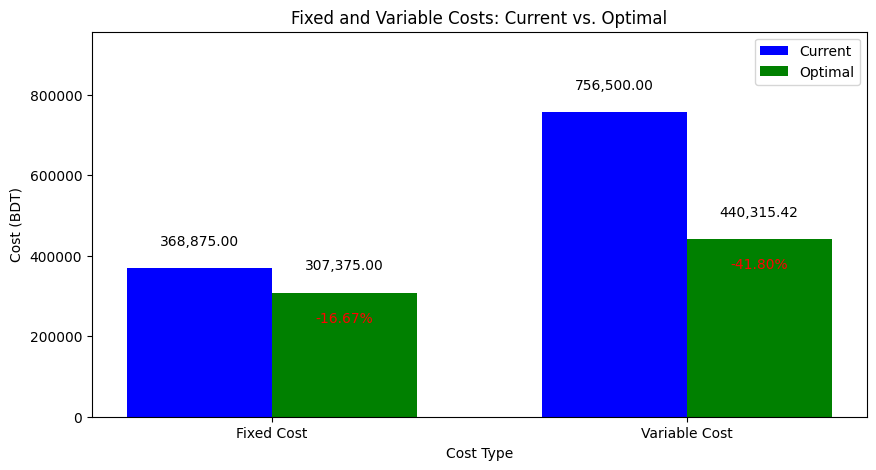

In [3]:
import matplotlib.pyplot as plt

# Data for the current and optimal costs
cost_labels = ['Current', 'Optimal']
total_costs = [1125375, 747690.42]

# Calculate the percentage reduction for total cost
percentage_reduction_total = ((total_costs[0] - total_costs[1]) / total_costs[0]) * 100

# Plot 1: Total Production Related Costs with percentage reduction
plt.figure(figsize=(10, 5))
plt.bar(cost_labels, total_costs, color=['blue', 'green'])

# Increase y-axis limit to give enough space
plt.ylim(0, max(total_costs) + 200000)

# Annotate the bars with the cost values and percentage reduction
for i in range(len(total_costs)):
    plt.text(i, total_costs[i] + 50000, f'{total_costs[i]:,.2f}', ha='center', va='bottom')
if percentage_reduction_total > 0:
    plt.text(1, total_costs[1] - 100000, f'-{percentage_reduction_total:.2f}%', ha='center', va='bottom', color='red')

plt.title('Total Production Related Cost: Current vs. Optimal')
plt.ylabel('Cost (BDT)')
plt.show()

# Data for the fixed and variable costs comparison
cost_types = ['Fixed Cost', 'Variable Cost']
current_costs = [368875, 756500]
optimal_costs = [307375, 440315.42]

# Calculate the percentage reductions for fixed and variable costs
percentage_reduction_fixed = ((current_costs[0] - optimal_costs[0]) / current_costs[0]) * 100
percentage_reduction_variable = ((current_costs[1] - optimal_costs[1]) / current_costs[1]) * 100

# Plot 2: Fixed and Variable Costs Comparison with percentage reductions
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = range(len(cost_types))

plt.bar(index, current_costs, bar_width, label='Current', color='blue')
plt.bar([i + bar_width for i in index], optimal_costs, bar_width, label='Optimal', color='green')

# Increase y-axis limit to give enough space
plt.ylim(0, max(current_costs) + 200000)

# Annotate the bars with the cost values and percentage reductions
for i in range(len(current_costs)):
    plt.text(i, current_costs[i] + 50000, f'{current_costs[i]:,.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, optimal_costs[i] + 50000, f'{optimal_costs[i]:,.2f}', ha='center', va='bottom')
    if i == 0:
        plt.text(i + bar_width, optimal_costs[i] - 80000, f'-{percentage_reduction_fixed:.2f}%', ha='center', va='bottom', color='red')
    else:
        plt.text(i + bar_width, optimal_costs[i] - 80000, f'-{percentage_reduction_variable:.2f}%', ha='center', va='bottom', color='red')

plt.title('Fixed and Variable Costs: Current vs. Optimal')
plt.xlabel('Cost Type')
plt.ylabel('Cost (BDT)')
plt.xticks([i + bar_width / 2 for i in index], cost_types)
plt.legend()
plt.show()
